In [1]:
# Include The Dependencies

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


In [46]:
# Collection Data and Preprocessing

In [47]:
dataset = pd.read_csv("medical_insurance.csv")

In [48]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
dataset.shape

(2772, 7)

In [50]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [52]:
dataset.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [53]:
dataset.select_dtypes(['object']).columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [54]:
dataset.select_dtypes(['int64','float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

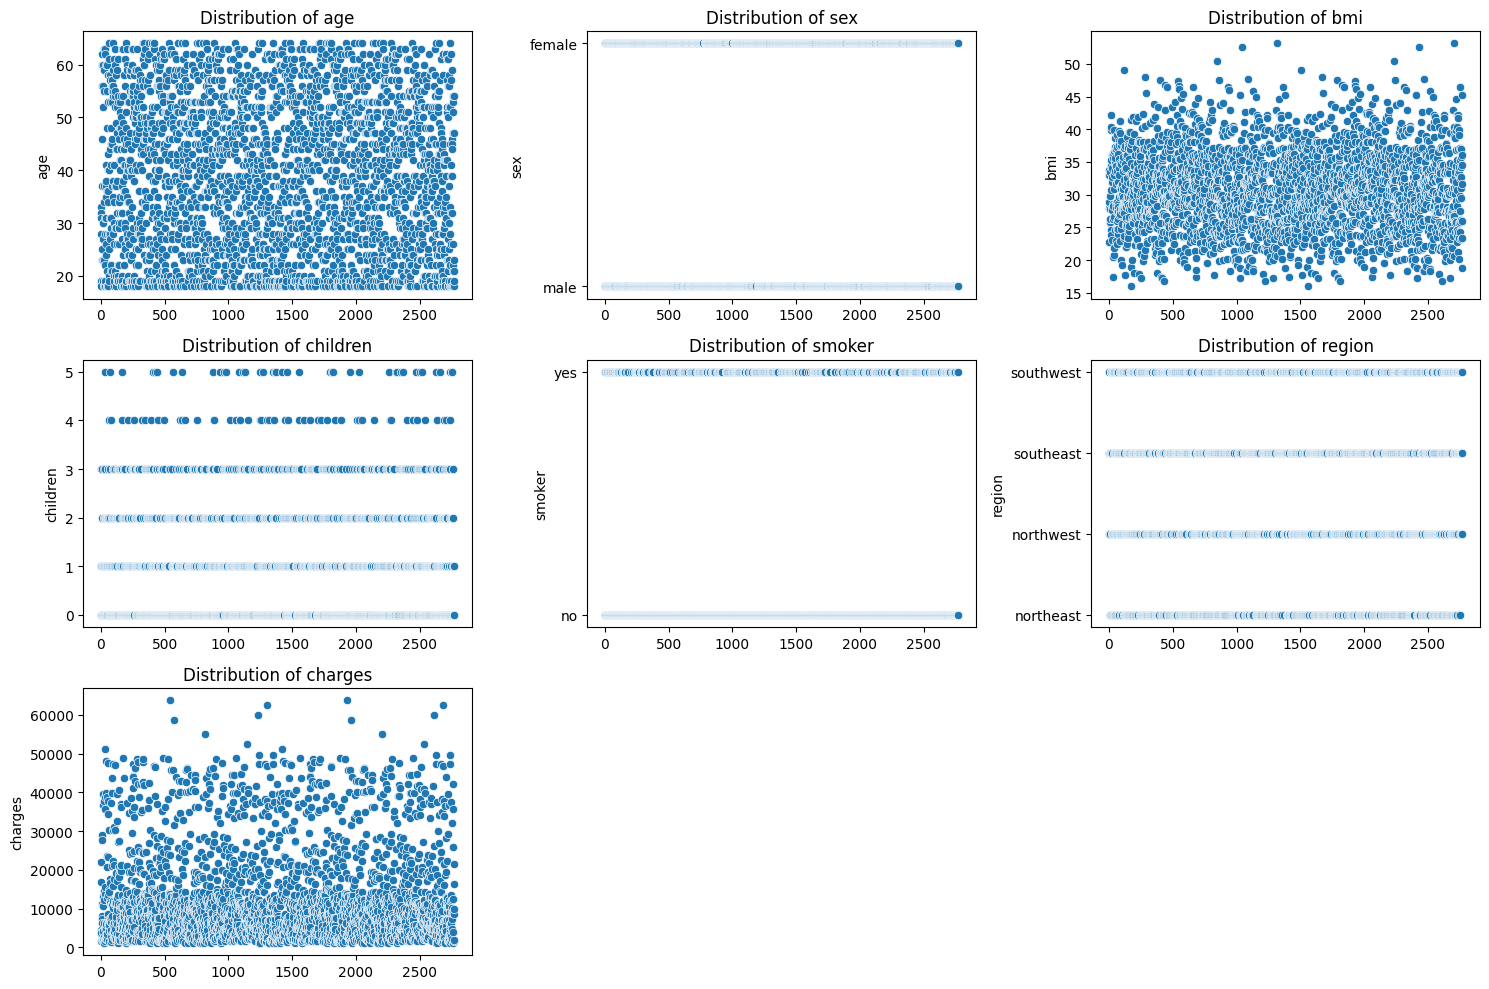

In [55]:
plt.figure(figsize=(15,10))
for i, col in enumerate(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], 1):
    plt.subplot(3,3,i)
    sns.scatterplot(dataset[col])
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()
    

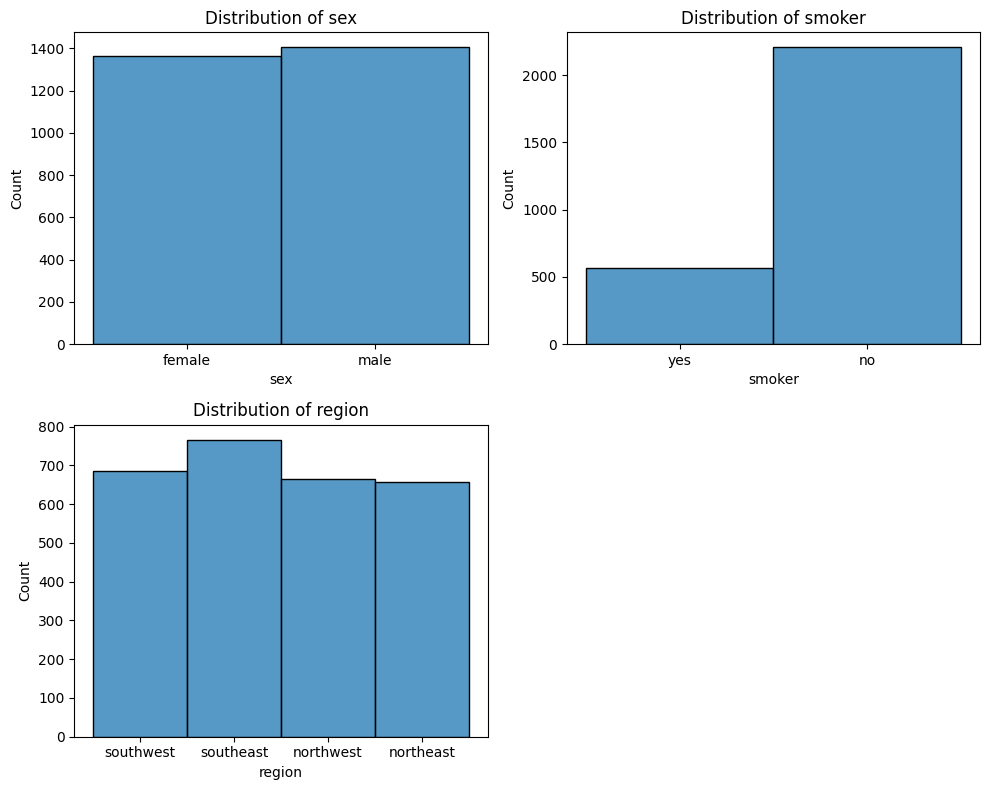

In [56]:
plt.figure(figsize=(10,8))
for i, col in enumerate(['sex', 'smoker', 'region'], 1):
    plt.subplot(2,2,i)
    sns.histplot(dataset[col])
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()
    

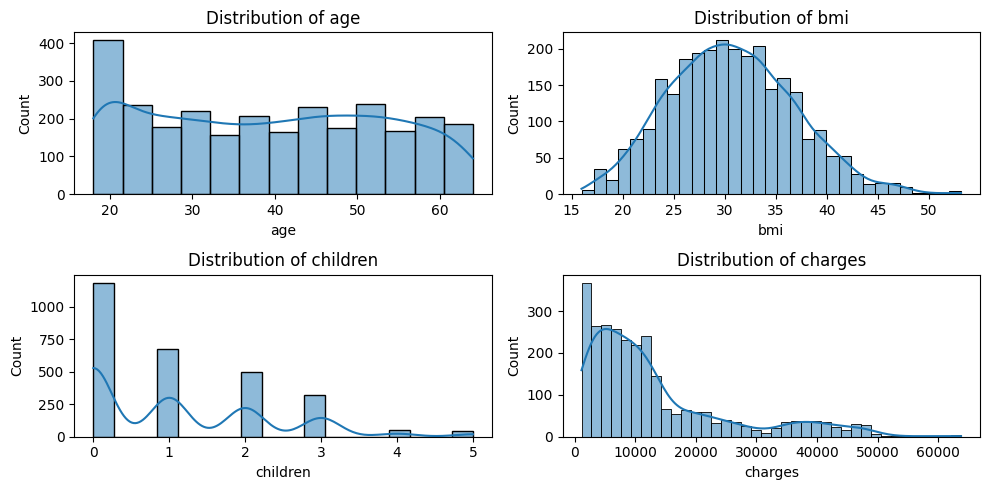

In [57]:
plt.figure(figsize=(10,5))
for i, col in enumerate(['age', 'bmi', 'children', 'charges'], 1):
    plt.subplot(2,2,i)
    sns.histplot(dataset[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

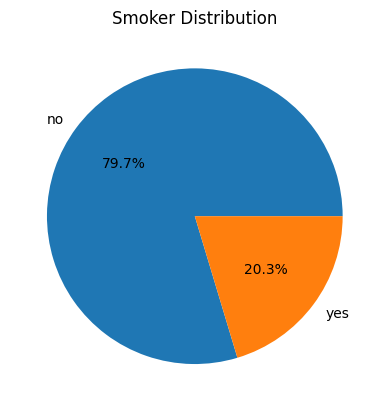

In [58]:
smoker_counts = dataset['smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%')
plt.title("Smoker Distribution")
plt.show()


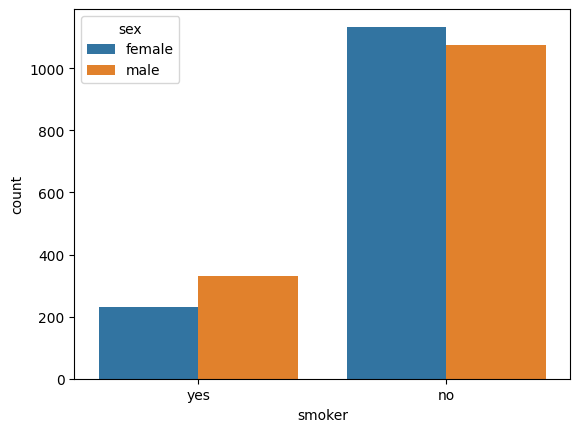

In [59]:
sns.countplot(x = 'smoker', data=dataset, hue='sex', legend=True)
plt.show()

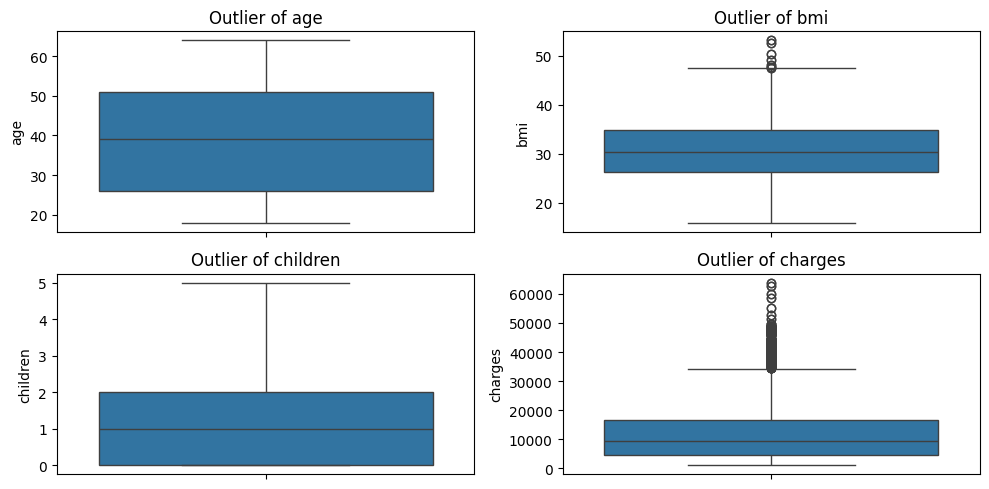

In [60]:
plt.figure(figsize=(10,5))
for i, col in enumerate(['age', 'bmi', 'children', 'charges'], 1):
    plt.subplot(2,2,i)
    sns.boxplot(dataset[col])
    plt.title(f"Outlier of {col}")
plt.tight_layout()
plt.show()

In [61]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [62]:
dataset['age'].value_counts().unique()

array([148, 142,  62,  60,  58,  56,  54,  52,  50,  48,  46])

In [63]:
dataset['sex'].value_counts().unique()

array([1406, 1366])

In [64]:
dataset['bmi'].value_counts().unique()

array([26, 18, 16, 14, 12, 10,  8,  6,  4,  2])

In [65]:
dataset['children'].value_counts().unique()

array([1186,  672,  496,  324,   52,   42])

In [66]:
dataset['smoker'].value_counts().unique()

array([2208,  564])

In [67]:
dataset['region'].value_counts().unique()

array([766, 684, 664, 658])

In [68]:
one_data = dataset[['sex', 'smoker']]
# one_data

In [69]:
o = pd.get_dummies(one_data)
o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex_female  2772 non-null   bool 
 1   sex_male    2772 non-null   bool 
 2   smoker_no   2772 non-null   bool 
 3   smoker_yes  2772 non-null   bool 
dtypes: bool(4)
memory usage: 11.0 KB


In [174]:
on = OneHotEncoder(drop='first')
ot = on.fit_transform(one_data).toarray()


In [175]:
dataset[['sex', 'smoker']] = pd.DataFrame(ot, columns=['sex_male','smoker_yes']).astype('int64')

In [72]:
la = LabelEncoder()
la.fit(dataset['region'])

LabelEncoder()

In [73]:
dataset['region'] = pd.DataFrame(la.transform(dataset['region']), columns=['region']).astype('int64')

In [74]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [75]:
# Divided into Train and Test Dataset

In [76]:
x = dataset.iloc[:,:-1]
y = dataset['charges']

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [79]:
x.shape, x_train.shape, x_test.shape, y_train.shape

((2772, 6), (2217, 6), (555, 6), (2217,))

In [80]:
# Training Model

In [81]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train), lr.score(x_test, y_test)

(0.753395406601626, 0.7398864322395977)

In [82]:
mean_absolute_error(y_test,lr.predict(x_test))

4167.3014359745075

In [83]:
cross_val_score(SVR(),x_train,y_train,cv=5)

array([-0.11836987, -0.10621712, -0.10691717, -0.0914759 , -0.11476904])

In [84]:
sm = SVR()
sm.fit(x_train,y_train)
sm.score(x_train,y_train), sm.score(x_test, y_test)

(-0.10501077525569924, -0.0710175639390056)

In [85]:
mean_absolute_error(y_test,sm.predict(x_test))

8284.377128075497

In [86]:
cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5)

array([0.93209428, 0.93918627, 0.91913371, 0.94902607, 0.89811958])

In [108]:
rm = RandomForestRegressor()
rm.fit(x_train,y_train)
rm.score(x_train,y_train), rm.score(x_test, y_test)

(0.9920192087295379, 0.9493360315151972)

In [105]:
rm.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [99]:
mean_absolute_error(y_test,rm.predict(x_test))

1312.2680085670083

In [100]:
km = KNeighborsRegressor()
km.fit(x_train,y_train)
km.score(x_train,y_train), km.score(x_test, y_test)

(0.615859162271466, 0.4045505292910392)

In [101]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train), dt.score(x_test, y_test)

(0.9997587266398212, 0.9497617729979223)

In [102]:
le = Lasso()
le.fit(x_train,y_train)
le.score(x_train,y_train), le.score(x_test, y_test)

(0.7533953199604214, 0.7398766635570444)

In [103]:
ri = Ridge()
ri.fit(x_train,y_train)
ri.score(x_train,y_train), ri.score(x_test, y_test)

(0.7533906127706953, 0.7398118279059396)

In [110]:
et = ElasticNet()
et.fit(x_train,y_train)
et.score(x_train,y_train), et.score(x_test, y_test)

(0.3908167492396494, 0.4088614666437346)

In [109]:
# Select Model Automaticaly based on thire high r2 score

In [111]:
models = [
    ("Liner", lr),
    ("lesso", le),
    ("Ridge", ri),
    ("super_vector", sm),
    ("decision_tree", dt),
    ("ElasticNet", et),
    ("random_forest", rm),
    ("knn", km)
]

In [112]:
results = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    results.append({
        "Model": name,
        "MSE" :  mean_squared_error(y_test,y_pred),
        "Rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
         "r2_score": r2_score(y_test, y_pred)

        
    })

In [119]:
regression_model = pd.DataFrame(results)
print(regression_model)


           Model           MSE          Rmse  r2_score
0          Liner  3.992248e+07   6318.423803  0.739886
1          lesso  3.992398e+07   6318.542448  0.739877
2          Ridge  3.993393e+07   6319.329846  0.739812
3   super_vector  1.643808e+08  12821.107630 -0.071018
4  decision_tree  1.205631e+07   3472.219258  0.921448
5     ElasticNet  9.072851e+07   9525.151333  0.408861
6  random_forest  7.840299e+06   2800.053468  0.948917
7            knn  9.139015e+07   9559.819806  0.404551


In [120]:
best_model_name = regression_model.loc[regression_model['r2_score'].idxmax(), 'Model']
print(f"Best model selected: {best_model_name}")


Best model selected: random_forest


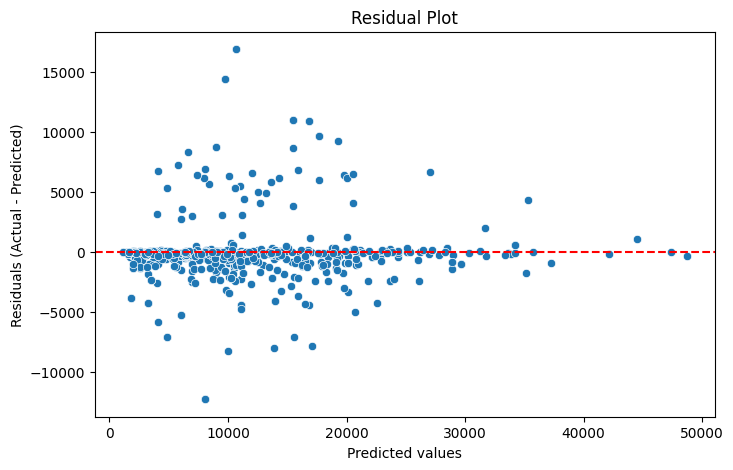

In [122]:
residuals = y_test - rm.predict(x_test)

# Residual plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.savefig("img.jpg")
plt.show()


In [ ]:
# Test Model Using Train data

In [132]:
x_train.values[10]

array([18.  ,  1.  , 34.43,  0.  ,  0.  ,  2.  ])

In [133]:
rm.predict([[18.  ,  1.  , 34.43,  0.  ,  0.  ,  2.  ]])

C:\Users\amiya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1137.400895])

In [134]:
y_train.values[10]

np.float64(1137.4697)

In [135]:
# Save Model and Test Using Test and Random data

In [136]:
from joblib import dump, load

In [137]:
dump(rm, "Medical_cost.pkl")

['Medical_cost.pkl']

In [138]:
model_ready = load('Medical_cost.pkl')

In [142]:
sam = x_test.values[120]
sam_arr = np.array(sam)
re_sam = sam_arr.reshape(1,-1)

In [187]:
print("The cost is : ",model_ready.predict(re_sam))

The cost is :  [3197.7520282]


C:\Users\amiya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [144]:
y_test.values[120]

np.float64(3056.3881)

In [181]:
input_data = pd.DataFrame([[33	,'male',	22.705,	0,	'no',	'northwest']], columns=x.columns)

In [182]:
input_data

,age,sex,bmi,children,smoker,region
0,33,male,22.705,0,no,northwest


In [183]:
input_data['smoker'] = input_data['smoker'].map({"no":1, "yes":0})
input_data['sex'] = input_data['sex'].map({"female":1, "male":0})


In [184]:
input_data['region'] = pd.DataFrame(la.transform(input_data['region']), columns=['region']).astype('int64')



In [185]:
input_data

,age,sex,bmi,children,smoker,region
0,33,0,22.705,0,1,1


In [188]:
print("The cost is: ", model_ready.predict(input_data))

The cost is:  [17693.6880295]
